In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pld
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
torch.manual_seed(0) # set fixed set of randome number on the basis of seed value
     

In [3]:
my_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"]) # color map

In [4]:
data, labels = make_blobs(n_samples=1000, centers = 4, n_features=2, random_state=0)
print(data.shape, labels.shape)
     

(1000, 2) (1000,)


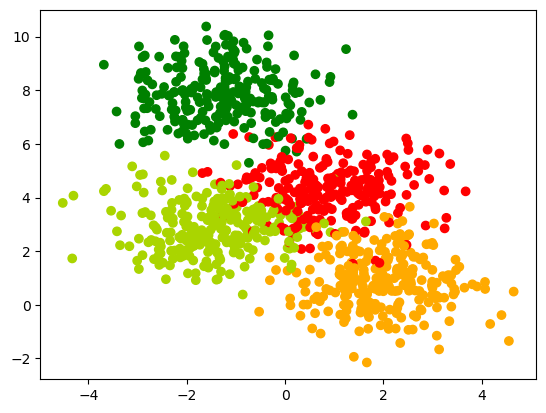

In [5]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_map)
plt.show()

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


In [7]:
# converting X_train, X_val, Y_train, Y_val in to pytorch tensors using map() function

X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))

print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [8]:
class FFNetwork(nn.Module):  # extends nn.Mudule
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    
    # we need to wrap the weights and biases
    
    self.weights1 = nn.Parameter(torch.randn(2,2) / math.sqrt(2)) 
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2,4) / math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))
  
  def forward(self, X):
    a1 = torch.matmul(X, self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(a1, self.weights2) + self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    
    return h2

def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1) # taking maximum from y_hat row wise
  return (pred == y).float().mean()

In [9]:
def fit(epochs=1000, learning_rate = 1):
  
  X_train_ = X_train.float()
  Y_train_ = Y_train.long() 
  
  loss_arr = []
  acc_arr = []
  
  
  for i in range(epochs):
    y_hat = fn(X_train_)  # here fn is our defined class FFNetwork. We are instanciating it by passing X_train so it automatically called forward.
    loss = F.cross_entropy(y_hat, Y_train_)
    
    
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train_))
    
  
    
    loss.backward()
    
    with torch.no_grad():
      for param in fn.parameters():   # for all parameters in fn.Parameters as we have wrapped them in nn.Parameter, we are able to access them iteratively 
        
        param -= param.grad * learning_rate
      
      fn.zero_grad() # this the function of nn.Module which will refresh all the grads of parameters
        
  
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()

  print("Loss before training", loss_arr[0])
  print("Loss after training", loss_arr[-1])

In [2]:
fn = FFNetwork()
fit()

NameError: name 'FFNetwork' is not defined

In [ ]:
##Reference: https://github.com/Abhishek113/Feed_Forward_NN_Pytorch/blob/master/FFNNetworkd_with_Pytorch.ipynb